In [ ]:
# Input file name. The input file must contain two sheets with the following names: "infor" & "formula"
input_file = "mini project_v7"

# Output file name
output_file = f"{input_file}_results"

# Implement data processsing
data_process = 1
# Plot output: 0=No & 1=yes
mapping_plot = 1
corr_plot = 0
his_plot = 1
ml_reg_plot = 0
ml_class_plot = 0

# list of features
lst_features = [
    "Li",
    "aF",
    "aO",
    "sC",
    "sO",
    "sF",
    "pi",
    "cyclic",
    "apol",
    "Vabc-",
    "SLogP-r",
    "Radius-r",
]

# list of colors used
lst_colors = [
    "tab:blue",
    "tab:green",
    "tab:orange",
    "tab:red",
    "tab:olive",
    "tab:purple",
    "tab:cyan",
    "tab:gray",
    "tab:brown",
    "magenta",
    "darkgreen",
    "deeppink",
]

# histogram plot
bins_num = 30

# slit ratio
split = 0.8

 LiFSI  187.07999999999998
 DME  90.12
 LiFSI  187.07999999999998
 DME  90.12
 LiFSI  187.07999999999998
 DME  90.12
 LiFSI  187.07999999999998
 DME  90.12
 LiFSI  187.07999999999998
 DME  90.12
 PFB  148.07999999999998
 LiFSI  187.07999999999998
 DME  90.12
 PFB  148.07999999999998
 LiFSI  187.07999999999998
 DME  90.12
 PFB  148.07999999999998
 LiFSI  187.07999999999998
 DME  90.12
 FB  96.10000000000001
 LiFSI  187.07999999999998
 DME  90.12
 FB  96.10000000000001
 LiFSI  187.07999999999998
 DME  90.12
 FB  96.10000000000001
 LiFSI  187.07999999999998
 DME  90.12
 TTE  232.082
 LiFSI  187.07999999999998
 DME  90.12
 TTE  232.082
 LiFSI  187.07999999999998
 DME  90.12
 TTE  232.082
 LiFSI  187.07999999999998
 DEE  118.172
 LiFSI  187.07999999999998
 DEE  118.172
 LiFSI  187.07999999999998
 DEE  118.172
 LiFSI  187.07999999999998
 DEE  118.172
 LiFSI  187.07999999999998
 DEE  118.172
 PFB  148.07999999999998
 LiFSI  187.07999999999998
 DEE  118.172
 PFB  148.07999999999998
 LiFSI  187

C:\Users\Admin\AppData\Local\Temp\ipykernel_9256\4057633729.py:253: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.757' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.formula.loc[i, prop] = round(total_value, 3) if total_value != 0 else 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_9256\4057633729.py:253: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '87.589' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.formula.loc[i, prop] = round(total_value, 3) if total_value != 0 else 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_9256\4057633729.py:253: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.739' has dtype incompatible with int64, please explicitly c

KeyError: 'Vabc:'

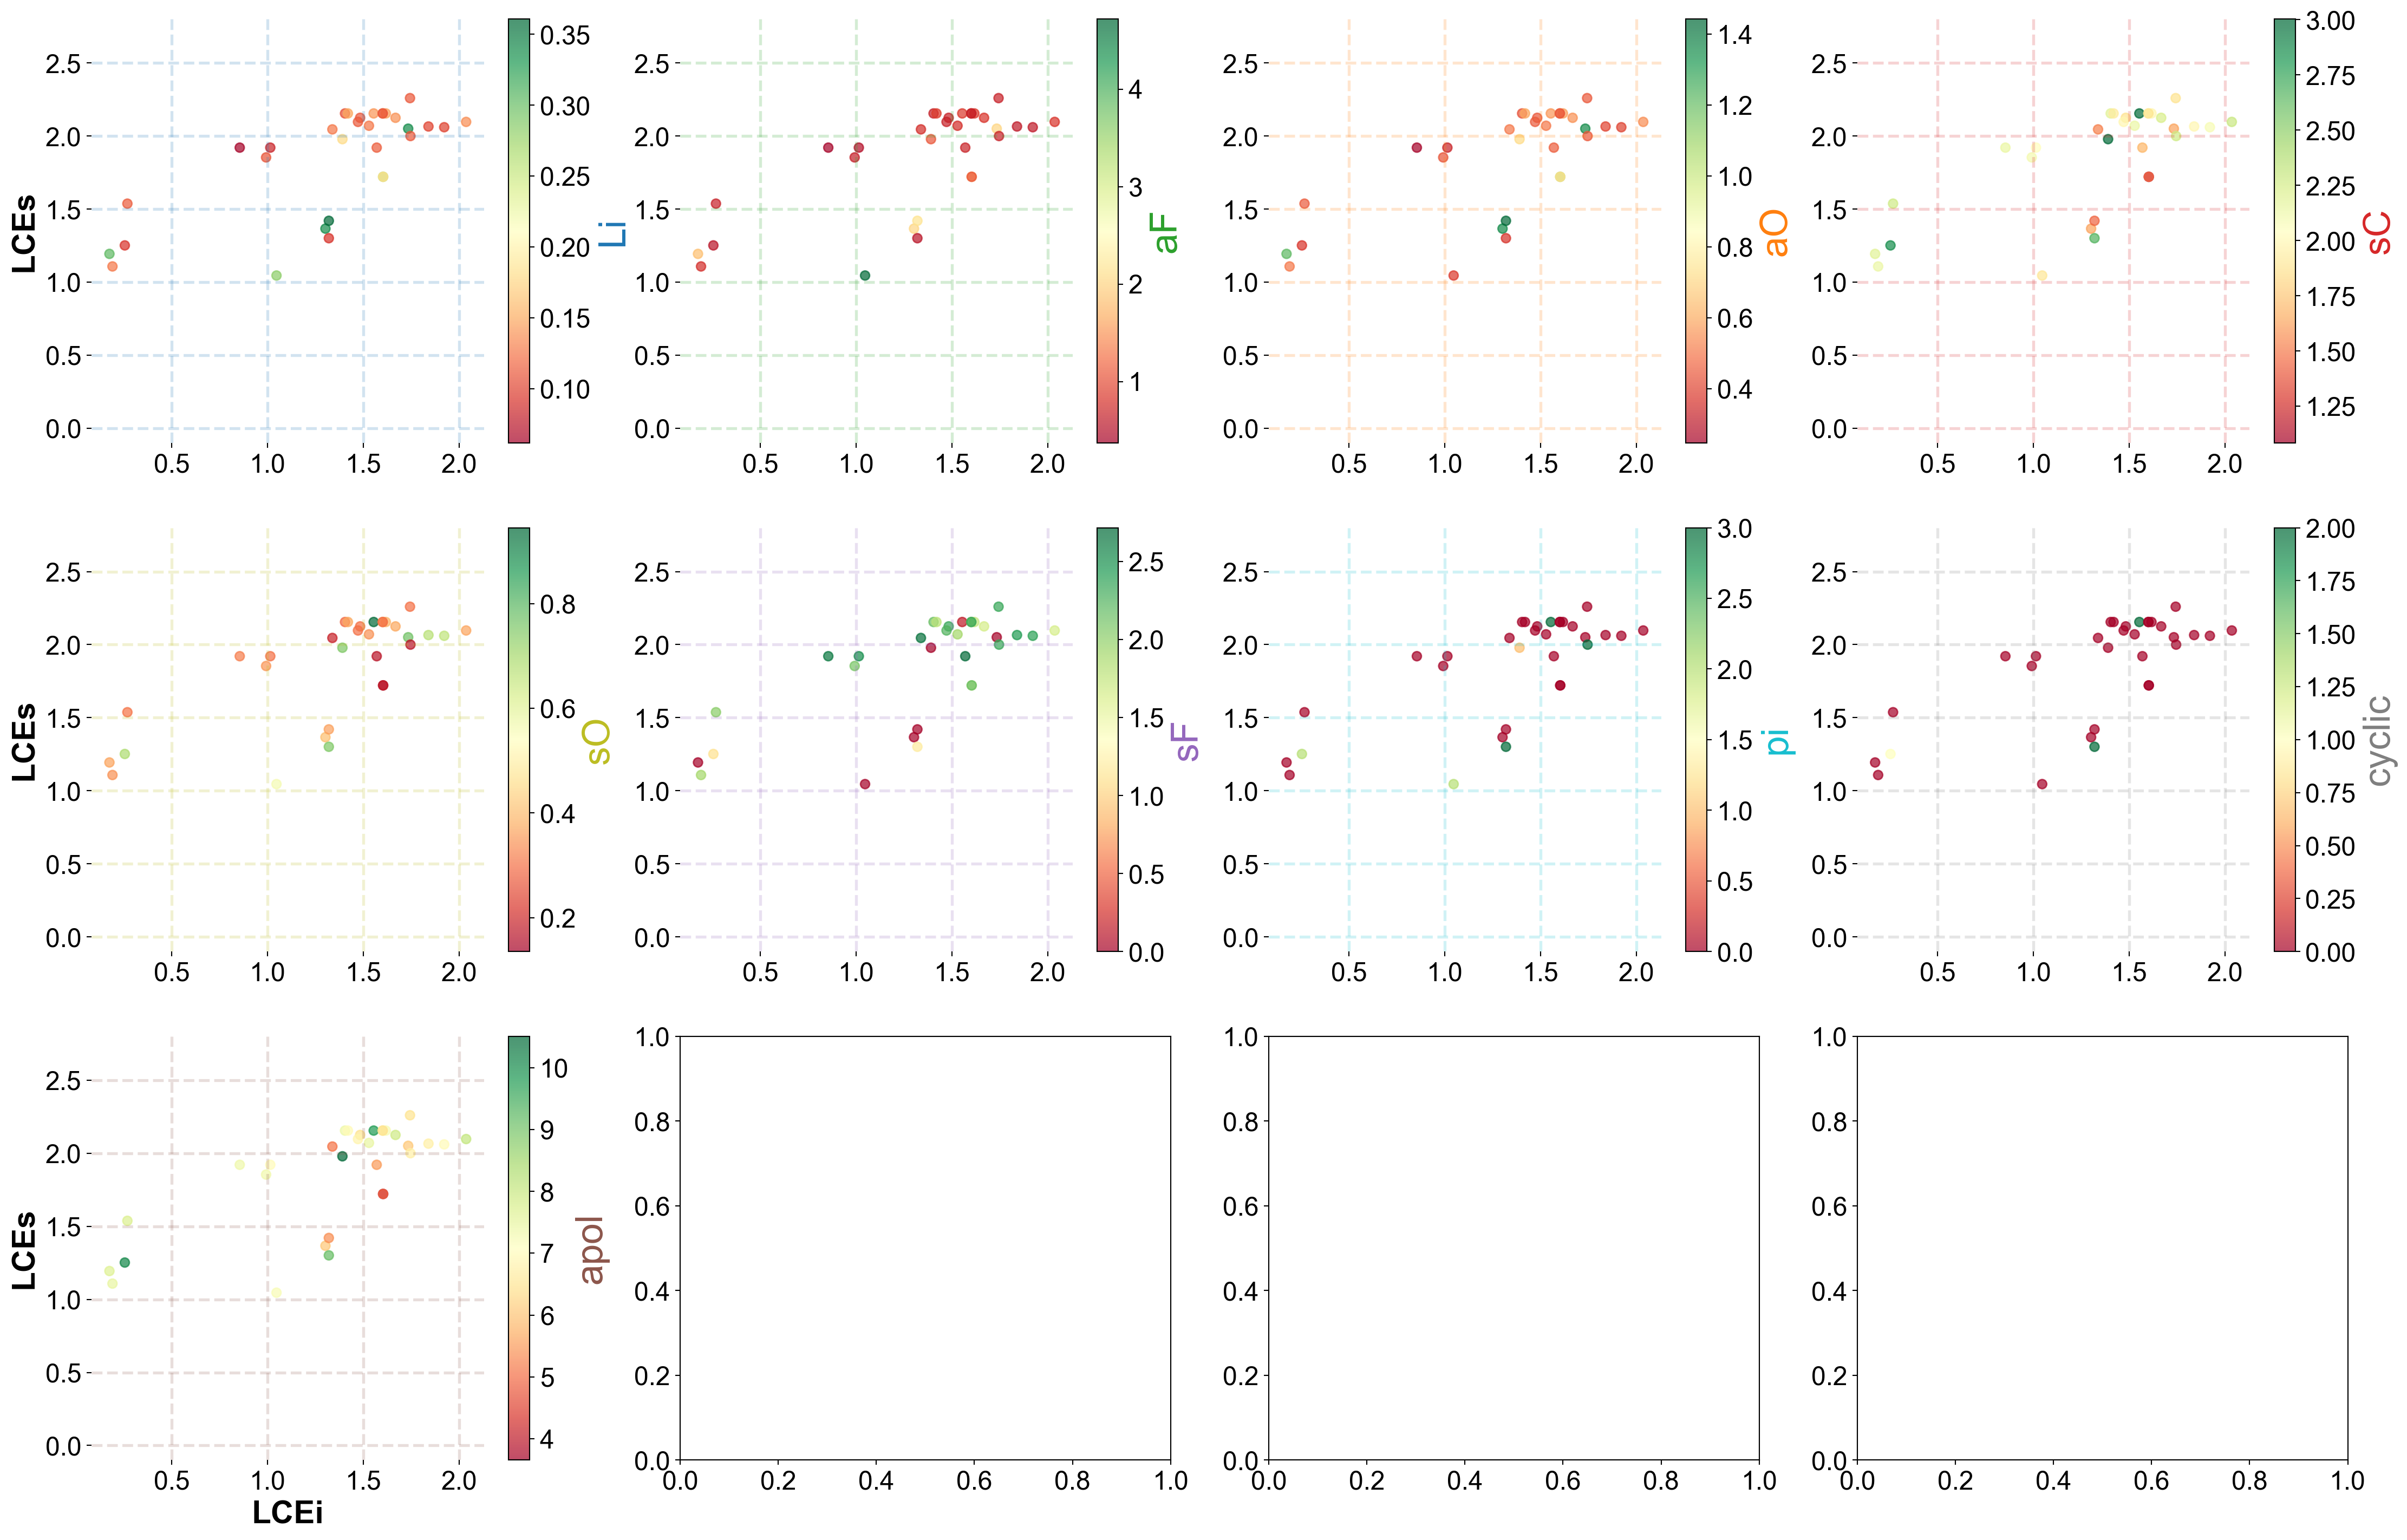

In [10]:
import pandas as pd
import numpy as np
import re
import itertools
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix

class Main:

    def __init__(self, input_file=f'{input_file}.xlsx'):
        self.input_file = input_file
        self.formula = pd.read_excel(input_file, sheet_name='formula')
        self.infor = pd.read_excel(input_file, sheet_name='infor')
        # Add space before each compound name in infor
        self.infor['compound'] = ' ' + self.infor['compound'] + ' '
        # Declare these dicts as instance variables so they can be accessed throughout the class
        self.mw_dict = dict(zip(self.infor['compound'], self.infor['MW']))
        self.vabc_dict = dict(zip(self.infor['compound'], self.infor['Vabc'])) 
        self.o_dict = dict(zip(self.infor['compound'], self.infor['O']))
        self.f_dict = dict(zip(self.infor['compound'], self.infor['F']))
        self.c_dict = dict(zip(self.infor['compound'], self.infor['C']))
        self.h_dict = dict(zip(self.infor['compound'], self.infor['H']))
        self.SLogP_dict = dict(zip(self.infor['compound'], self.infor['SLogP']))
        self.cyclic_dict = dict(zip(self.infor['compound'], self.infor['cyclic']))
        self.smiles_dict = dict(zip(self.infor['compound'], self.infor['SMILES']))

    # draw cmap plot
    def plot_cmap(self, labels, data, ax, chart_type='bar', cmap='viridis'):
        scaled_data = np.linspace(0.05, 1, len(data))
        colors = [mpl.colormaps.get_cmap(cmap)(decimal) for decimal in scaled_data]
        fig.patch.set_facecolor('white')

        try:
            getattr(ax, chart_type)(labels, data, color=colors)
        except AttributeError:
            getattr(ax, chart_type)(data, labels=labels, colors=colors)

    # draw confusion plot
    def plot_confusion(self, Y, ax, matrix, title='Confusion Matrix', rf='.0f', shrink=0.3):
        im = ax.imshow(matrix, interpolation='nearest', cmap='viridis')
        ax.set_xticks(range(np.unique(Y).shape[0]))
        ax.set_yticks(range(np.unique(Y).shape[0]))
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('True label', fontsize=14)
        ax.set_ylabel('Predicted label', fontsize=14)
        cbar = plt.colorbar(im, ax=ax, shrink=shrink)
        for m, n in itertools.product(range(matrix.shape[1]), range(matrix.shape[0])):
            ax.text(n, m, format(matrix[m, n], rf), ha="center", va="center", color="w")

    # create small random number
    def rand_jitter(self, arr):
        np.random.seed(random_state)
        if len(arr) == 0:
            stdev = 0
        else:
            stdev = 0.04 * (max(arr) - min(arr))
        jitter = arr + (np.random.randn(len(arr)) * stdev)

        return jitter
        
    # calculate spearman correlation coefficient
    def cal_rsq(self, x, y):
        rsq = spearmanr(x, y)[0]

        return rsq

    def moles(self):
        mw_dict = self.mw_dict
        o_dict = self.o_dict
        f_dict = self.f_dict
        c_dict = self.c_dict
        h_dict = self.h_dict
        self.formula.columns = self.formula.columns.str.strip()
        # Process formula data
        for index, row in self.formula.iterrows():
            formula_str = str(row['formula']).strip()
            match = re.match(r"([A-Za-z0-9\-]+(?:-[A-Za-z0-9\-]+)*)\s*\(([\d\.\-]+(?:-[\d\.\-]+)*)\s*mol\)", formula_str)
            if not match:
                continue
                
            compounds_part, mols_part = match.groups()
            compounds = compounds_part.split("-")
            compounds = [" " + compound + " " for compound in compounds]
            original_mols = [float(m) for m in mols_part.split("-")]
                
            if len(compounds) != len(original_mols):
                continue
                    
            total_mass = 0
            for compound, mol in zip(compounds, original_mols):
                for k in mw_dict.keys():
                    if compound in k:
                        print (compound, mw_dict[k])
                        total_mass += mw_dict[k] * mol if pd.notna(mw_dict[k]) else 0
                        break
                
            scale_factor = 100 / total_mass if total_mass > 0 else 0
                
            for i, (compound, mol_val) in enumerate(zip(compounds, original_mols), start=1):
                self.formula.loc[index, f"c{i}"] = compound
                self.formula.loc[index, f"n{i}"] = mol_val * scale_factor

        # calcualte total mol of Li salt and solvent
        for i in self.formula.index:
            s_count = 1  
            a_count = 1
            Li = 0
            sol = 0
            
            for j in range(1, 9):
                c_col = f'c{j}'
                n_col = f'n{j}'
                if c_col in self.formula.columns and pd.notna(self.formula.loc[i, c_col]):
                    compound = self.formula.loc[i, c_col]
                    n_value = self.formula.loc[i, n_col]
                    
                    if 'Li' in compound:
                        Li += n_value
                        for k in o_dict.keys():
                            if compound in k:
                                self.formula.loc[i, f'a{a_count}O'] = o_dict[k] * n_value if pd.notna(o_dict[k]) else 0
                                self.formula.loc[i, f'a{a_count}F'] = f_dict[k] * n_value if pd.notna(f_dict[k]) else 0
                                a_count += 1
                                break
                    else:
                        sol += n_value
                        for k in o_dict.keys():
                            if compound in k:
                                self.formula.loc[i, f's{s_count}C'] = c_dict[k] * n_value if pd.notna(c_dict[k]) else 0
                                self.formula.loc[i, f's{s_count}H'] = h_dict[k] * n_value if pd.notna(h_dict[k]) else 0
                                self.formula.loc[i, f's{s_count}O'] = o_dict[k] * n_value if pd.notna(o_dict[k]) else 0
                                self.formula.loc[i, f's{s_count}F'] = f_dict[k] * n_value if pd.notna(f_dict[k]) else 0
                                s_count += 1
                                break
            
            self.formula.loc[i, 'Li'] = Li
            self.formula.loc[i, 'sol'] = sol
            self.formula.loc[i, 'Li/sol'] = round(Li/sol, 3) if sol != 0 else 0

        # calculate mol of each element
        prefix_suffix_pairs = [
            ('a', 'O'),
            ('a', 'F'),
            ('s', 'C'),
            ('s', 'H'),
            ('s', 'O'),
            ('s', 'F'),
            ('s', 'P'),
            ('s', 'S')
        ]

        for prefix, suffix in prefix_suffix_pairs:
            cols = [col for col in self.formula.columns if col.startswith(prefix) and col.endswith(suffix) and len(col) == 3]
            self.formula[prefix + suffix] = self.formula[cols].sum(axis=1, skipna=True)
        self.formula['aF'] = self.formula['aF'] * 3
        self.formula['sO'] = self.formula['sO'] / 2 
        self.formula['sF/sC'] = self.formula.apply(lambda x: round(x['sF'] / x['sC'], 2) if pd.notna(x['sF']) and pd.notna(x['sC']) and x['sC'] != 0 else 0, axis=1)
        self.formula['sF/sO'] = self.formula.apply(lambda x: round(x['sF'] / x['sO'], 2) if pd.notna(x['sF']) and pd.notna(x['sO']) and x['sO'] != 0 else 0, axis=1)
        self.formula['sC.sH'] = self.formula.apply(lambda x: round(x['sC'] * x['sH'], 2) if pd.notna(x['sC']) and pd.notna(x['sH']) and x['sH'] != 0 else 0, axis=1)
        self.formula['sO/sC'] = self.formula.apply(lambda x: round(x['sO'] / x['sC'], 2) if pd.notna(x['sO']) and pd.notna(x['sC']) and x['sC'] != 0 else 0, axis=1)
    
    # calcualte # of double bonds
    def smiles(self):
        smiles_dict = self.smiles_dict
        self.formula['dbO'] = 0
        for i in self.formula.index:
            db_count = 0
            for j in range(1, 9):
                c_col = f'c{j}'
                if c_col in self.formula.columns and pd.notna(self.formula.loc[i, c_col]):
                    compound = self.formula.loc[i, c_col]
                    for k in smiles_dict.keys():
                        if compound in k and pd.notna(smiles_dict[k]):
                            db_count += smiles_dict[k].count('=O')
                            break
            self.formula.loc[i, 'dbO'] = db_count
        self.formula['sbO'] = self.formula['sO'] - self.formula['dbO']

    # calcualte pct
    def pct(self):
        for i in range(1, 9):
            c_col = f'c{i}'
            n_col = f'n{i}'
            
            if c_col in self.formula.columns:
                pct_col = f'%n{i}'
                self.formula[pct_col] = self.formula.apply(
                    lambda row: round(row[n_col] / row['sol'], 2) if pd.notna(row[c_col]) and 'Li' not in str(row[c_col]) else np.nan,
                    axis=1
                )

    # calcualte density
    def density(self):
        mw_dict = self.mw_dict
        vabc_dict = self.vabc_dict
        for i in self.formula.index:
            total_mw = 0
            total_vabc = 0
            for j in range(1, 9):
                c_col = f'c{j}'
                n_col = f'n{j}'
                if c_col in self.formula.columns and pd.notna(self.formula.loc[i, c_col]):
                    compound = self.formula.loc[i, c_col]
                    n_value = self.formula.loc[i, n_col]
                    if 'Li' not in compound:
                        for k in mw_dict.keys():
                            if compound in k:
                                total_mw += mw_dict[k] * n_value if pd.notna(mw_dict[k]) else 0
                                total_vabc += vabc_dict[k] * n_value if pd.notna(vabc_dict[k]) else 0
                                break
            
            self.formula.loc[i, 'density'] = round(total_mw/total_vabc, 3) if total_vabc != 0 else 0

    # calcualte radius, Vabc, apol, bpol
    def properties(self):
        properties = ['Radius', 'Vabc', 'apol', 'bpol']
        property_dicts = {prop: dict(zip(self.infor['compound'], self.infor[prop])) for prop in properties}
        SLogP_dict = self.SLogP_dict
        for prop in properties:
            self.formula[f'{prop}'] = self.formula[prop].astype(float)  
            self.formula[f'{prop}-'] = self.formula[f'{prop}-'].astype(float)
            self.formula[f'{prop}-r'] = self.formula[f'{prop}-r'].astype(float)
            self.formula[f'{prop}+'] = self.formula[f'{prop}+'].astype(float)
            self.formula[prop] = 0
            self.formula[f'{prop}-'] = 1
        for i in self.formula.index:
            for prop in properties:
                total_value = 0
                minus_value = 1
                for j in range(1, 9):
                    c_col = f'c{j}'
                    n_col = f'n{j}'
                    pct_col = f'%n{j}'
                    if c_col in self.formula.columns and pd.notna(self.formula.loc[i, c_col]):
                        compound = self.formula.loc[i, c_col]
                        n_value = self.formula.loc[i, n_col]
                        n2_value = self.formula.loc[i, pct_col]
                        if 'Li' not in compound:
                            for k in property_dicts[prop].keys():
                                if compound in k:
                                    total_value += property_dicts[prop][k] * n_value if pd.notna(property_dicts[prop][k]) else 0
                                    minus_value *= property_dicts[prop][k] ** n2_value if pd.notna(property_dicts[prop][k]) else 1
                                    break
                self.formula.loc[i, prop] = round(total_value, 3) if total_value != 0 else 0
                self.formula[f'{prop}-'] = self.formula[f'{prop}-'].astype(float)
                self.formula.loc[i, f'{prop}-'] = round(minus_value, 3) if minus_value != 1 else 1
        for prop in properties:
            self.formula[f'{prop}-r'] = self.formula.apply(lambda x: round(x[prop] / x['sol'], 3) if x['sol'] != 0 else 0, axis=1)
            self.formula[f'{prop}+'] = self.formula.apply(lambda x: round((2 * x[f'{prop}-r']) - x[f'{prop}-'], 3), axis=1)

        # calcualte SLogP
        for i in self.formula.index:
            total_slogp = 0
            for j in range(1, 9):
                c_col = f'c{j}'
                pct_col = f'%n{j}'
                if c_col in self.formula.columns and pd.notna(self.formula.loc[i, c_col]):
                    compound = self.formula.loc[i, c_col]
                    n2_value = self.formula.loc[i, pct_col]
                    if 'Li' not in compound:
                        for k in SLogP_dict.keys():
                            if compound in k:
                                if pd.notna(SLogP_dict[k]) and pd.notna(n2_value):
                                    total_slogp += 10**SLogP_dict[k] * n2_value
                                break
                                
            self.formula.loc[i, 'SLogP-r'] = round(np.log10(total_slogp), 3) if total_slogp > 0 else 0

    # calcualte cyclic
    def cyclic(self):
        cyclic_dict = self.cyclic_dict
        for i in self.formula.index:
            total_cyclic = 0
            for j in range(1, 9):
                c_col = f'c{j}'
                n_col = f'n{j}'
                if c_col in self.formula.columns and pd.notna(self.formula.loc[i, c_col]):
                    compound = self.formula.loc[i, c_col]
                    n_value = self.formula.loc[i, n_col]
                    if 'Li' not in compound:
                        for k in cyclic_dict.keys():
                            if compound in k:
                                total_cyclic += cyclic_dict[k] if pd.notna(cyclic_dict[k]) else 0
                                break
            self.formula.loc[i, 'cyclic'] = round(total_cyclic, 3) if total_cyclic != 0 else 0

    # calculate Pi
    def pi(self):
        smiles_dict = self.smiles_dict
        self.formula['pi'] = 0
        for i in self.formula.index:
            pi_count = 0
            for j in range(1, 9):
                c_col = f'c{j}'
                if c_col in self.formula.columns and pd.notna(self.formula.loc[i, c_col]):
                    compound = self.formula.loc[i, c_col]
                    if 'Li' not in compound:  # Only count for non-Li compounds
                        for k in smiles_dict.keys():
                            if compound in k and pd.notna(smiles_dict[k]):
                                pi_count += smiles_dict[k].count('=')  # Count all double bonds
                                break
            self.formula.loc[i, 'pi'] = pi_count
        
        # save out file with calculated results
        with pd.ExcelWriter(f'{output_file}.xlsx') as writer:
            self.formula.to_excel(writer, sheet_name='formula', index=True)
            self.infor.to_excel(writer, sheet_name='infor', index=True)

    # Get the processed output data for plotting
    def data_output(self):
        df = pd.read_excel(f'{output_file}.xlsx', sheet_name='formula')
        method_grp = df.groupby('method')
        cycle = method_grp.get_group('Cycle')
        aurbach = method_grp.get_group('Aurbach')

        return cycle, aurbach
    
    # Draw plots
    def plot_Cycle(self):
        fig, axs = plt.subplots(3, 4, figsize=(28, 18), dpi = 192)
        cycle = self.data_output()[0]
        aurbach = self.data_output()[1]

        count = 0
        for j in range(3):
            for i in range(4):
                c1 = cycle[lst_features[count]].astype(float)
                scatter = axs[j, i].scatter(cycle['LCEi'], cycle['LCEs'], c=c1, cmap='RdYlGn', s=40, alpha=0.7)

                # Set plot limits and grid
                axs[j, i].set_ylim(-0.1, 2.8)
                axs[j, i].grid(color=lst_colors[count], linestyle='--', linewidth=2, alpha=0.2)

                # Hide spines
                for spine in ["top", "right", "bottom", "left"]:
                    axs[j, i].spines[spine].set_visible(False)

                # Add color bar
                cbar = plt.colorbar(scatter, ax=axs[j, i])
                cbar.set_label(lst_features[count], fontsize=26, color=lst_colors[count])

                # Add axis labels
                if i == 0:
                    axs[j, i].set_ylabel('LCEs', fontweight="bold", fontsize=22)
                if j == 2:
                    axs[j, i].set_xlabel('LCEi', fontweight="bold", fontsize=22)

                count += 1

        axs[0, 1].text(1.08, 1.1, 'Cycle', fontsize=36, color='darkgoldenrod', verticalalignment='center', transform=axs[0, 1].transAxes)

        #plt.savefig('cycle_LCEs+LCEi.tif', bbox_inches='tight')
        plt.show()

    def plot_Aurbach(self):
        fig, axs = plt.subplots(3, 4, figsize=(28, 18), dpi = 192)
        aurbach = self.data_output()[1]
        lce = aurbach['LCEi'].to_numpy()

        count = 0
        for j in range(3):
            for i in range(4):
                c1 = aurbach[lst_features[count]].astype(float)

                scatter = axs[j, i].scatter(self.rand_jitter(lce), lce, c=c1, cmap='RdYlGn', s=40, alpha=0.7)

                # Set plot limits and grid
                axs[j, i].set_ylim(-0.1, 2.8)
                axs[j, i].grid(color=lst_colors[count], linestyle='--', linewidth=2, alpha=0.2)
                # Add color bar
                cbar = plt.colorbar(scatter, ax=axs[j, i])
                cbar.set_label(lst_features[count], fontsize=26, color=lst_colors[count])
                # Hide spines
                for spine in ["top", "right", "bottom", "left"]:
                    axs[j, i].spines[spine].set_visible(False)
                # Add axis labels
                if i == 0:
                    axs[j, i].set_ylabel('LCE', fontweight="bold", fontsize=22)
                if j == 2:
                    axs[j, i].set_xlabel('LCE + Jitter', fontweight="bold", fontsize=22)

                count += 1

        axs[0, 1].text(0.94, 1.08, 'Aurbach', fontsize=36, c='teal', verticalalignment='center', transform=axs[0, 1].transAxes)

        #plt.savefig('aurbach_LCE + jitter.tif', bbox_inches='tight')
        plt.show()

    def plot_LCEi_Cycle(self):
        fig, axs = plt.subplots(3, 4, figsize=(28, 18), dpi = 192)
        cycle = self.data_output()[0]

        count = 0
        for j in range(3):
            for i in range(4):
                if lst_features[count] == 'conductivity (mS.cm-1)':
                    df_drop = cycle.dropna(subset=[lst_features[count]], how='any')
                    x = df_drop[lst_features[count]].astype(float)
                    y = df_drop['LCEi'].astype(float)
                else:
                    x = cycle[lst_features[count]].astype(float)
                    y = cycle['LCEi'].astype(float)

                axs[j, i].scatter(x, y, edgecolor='black', linewidth=1, s=50, alpha=0.5, c=lst_colors[count])

                axs[j, i].set_xlabel(lst_features[count], fontweight="bold", fontsize=22, color=lst_colors[count])
                axs[j, i].set_ylabel('LCEi', fontweight="bold", fontsize=22)
                axs[j, i].set_ylim(-0.1, 2.6)
                axs[j, i].grid(color=lst_colors[count], linestyle='--', linewidth=2, alpha=0.2)
                for spine in ["top", "right", "bottom", "left"]:
                    axs[j, i].spines[spine].set_visible(False)

                axs[j, i].text(0.85, 0.1, '{:0.2f}'.format(self.cal_rsq(x, y)),
                            fontsize=20,
                            color='black',
                            verticalalignment='center',
                            transform=axs[j, i].transAxes,
                            bbox=dict(facecolor='white', edgecolor=lst_colors[count], boxstyle='round'))
                count += 1

        axs[0, 1].text(0.98, 1.1, 'Cycle', fontsize=36, color='darkgoldenrod', verticalalignment='center', transform=axs[0, 1].transAxes)

        #plt.savefig('cycle_LCEi.tif', bbox_inches='tight')
        plt.show()

    def plot_LCEs_Cycle(self):
        fig, axs = plt.subplots(3, 4, figsize=(28, 18), dpi = 192)
        cycle = self.data_output()[0]

        count = 0
        for j in range(3):
            for i in range(4):
                if lst_features[count] == 'conductivity (mS.cm-1)':
                    df_drop = cycle.dropna(subset=lst_features[count], how='any')
                    x = df_drop[lst_features[count]].astype(float)
                    y = df_drop['LCEs'].astype(float)
                else:
                    x = cycle[lst_features[count]].astype(float)
                    y = cycle['LCEs'].astype(float)
                    
                axs[j, i].scatter(x, y, edgecolor='black', linewidth=1, s=50, alpha=0.5, c=lst_colors[count])

                axs[j, i].set_xlabel(lst_features[count], fontweight="bold", fontsize=22, c=lst_colors[count])
                axs[j, i].set_ylabel('LCEs', fontweight="bold", fontsize=22)
                axs[j, i].set_ylim(-0.1, 2.6)
                axs[j, i].grid(color=lst_colors[count], linestyle ='--', linewidth=2, alpha=0.2)
                for spine in ["top", "right", "bottom", "left"]:
                    axs[j, i].spines[spine].set_visible(False)
                
                axs[j, i].text(0.85, 0.1, '{:0.2f}'.format(self.cal_rsq(x,y)),
                            fontsize=20,
                            c='black',
                            verticalalignment='center',
                            transform=axs[j, i].transAxes,
                            bbox=dict(facecolor='white', edgecolor=lst_colors[count], boxstyle='round'))
                count+=1
                
        axs[0,1].text(0.98, 1.1, 'Cycle', fontsize=36, c='darkgoldenrod', verticalalignment='center', transform=axs[0,1].transAxes)

        #plt.savefig('cycle_LCEs.tif', bbox_inches = 'tight')
        plt.show()

    def plot_LCE_Aurach(self):
        fig, axs = plt.subplots(3, 4, figsize=(28, 18), dpi = 192)
        aurbach = self.data_output()[1]

        count = 0
        for j in range(3):
            for i in range(4):
                if lst_features[count] == 'conductivity (mS.cm-1)':
                    df_drop = aurbach.dropna(subset=lst_features[count], how='any')
                    x = df_drop[lst_features[count]].astype(float)
                    y = df_drop['LCEi'].astype(float)
                else:
                    x = aurbach[lst_features[count]].astype(float)
                    y = aurbach['LCEi'].astype(float)
                    
                axs[j, i].scatter(x, y, edgecolor='black', linewidth=1, s=60, alpha=0.5, c=lst_colors[count])

                axs[j, i].set_xlabel(lst_features[count], fontweight="bold", fontsize=22, c=lst_colors[count])
                axs[j, i].set_ylabel('LCE', fontweight="bold", fontsize=22)
                axs[j, i].set_ylim(-0.1, 2.6)
                axs[j, i].grid(color=lst_colors[count], linestyle ='--', linewidth=2, alpha=0.2)
                for spine in ["top", "right", "bottom", "left"]:
                    axs[j, i].spines[spine].set_visible(False)

                axs[j, i].text(0.85, 0.1, '{:0.2f}'.format(self.cal_rsq(x,y)),
                            fontsize=20,
                            c='black',
                            verticalalignment='center',
                            transform=axs[j, i].transAxes,
                            bbox=dict(facecolor='white', edgecolor=lst_colors[count], boxstyle='round'))
                count+=1
                
        axs[0,1].text(0.94, 1.08, 'Aurbach', fontsize=36, c='teal', verticalalignment='center', transform=axs[0,1].transAxes)

        #plt.savefig('aurbach_LCE.tif', bbox_inches = 'tight')
        plt.show()

    # draw histogram plot
    def his_Cycle(self):
        fig, axs = plt.subplots(3, 4, figsize=(28, 18), dpi=192)
        cycle = self.data_output()[0]

        count = 0
        for i in range(3):
            for j in range(4):
                sns.histplot(data=cycle, x=lst_features[count], bins=bins_num, ax=axs[i, j], kde=True, color=lst_colors[count])
                axs[i, j].set_ylabel("Count", fontsize=22)
                axs[i, j].set_xlabel(lst_features[count], fontsize=22, color=lst_colors[count])
                count += 1
                
        axs[0, 1].text(0.90, 1.1, 'Aurbach', fontsize=40, color='darkgoldenrod', verticalalignment='center', transform=axs[0, 1].transAxes)

        #plt.savefig('aurbach_histogram.tif', bbox_inches='tight')
        plt.show()
    
    def his_Aurbach(self):
        fig, axs = plt.subplots(3, 4, figsize=(28, 18), dpi=192)
        aurbach = self.data_output()[1]

        count = 0
        for i in range(3):
            for j in range(4):
                sns.histplot(data=aurbach, x=lst_features[count], bins=bins_num, ax=axs[i, j], kde=True, color=lst_colors[count])
                axs[i, j].set_ylabel("Count", fontsize=22)
                axs[i, j].set_xlabel(lst_features[count], fontsize=22, color=lst_colors[count])
                count += 1

        axs[0, 1].text(0.90, 1.1, 'Aurbach', fontsize=40, color='teal', verticalalignment='center', transform=axs[0, 1].transAxes)

        #plt.savefig('aurbach_histogram.tif', bbox_inches='tight')
        plt.show()
    
    # draw ML plots
    def regression(self):
        fig, axs = plt.subplots(2,3, figsize=(28, 14), dpi = 192)
        cycle = self.data_output()[0]
        aurbach = self.data_output()[1]
 
        model_cycle = RandomForestRegressor(n_estimators=140, max_depth=30,
                                            criterion='absolute_error',
                                            random_state=random_state)

        model_aurbach = RandomForestRegressor(n_estimators=340, max_depth=24,
                                            criterion='absolute_error',
                                            random_state=random_state)

        models = [model_cycle, model_cycle, model_aurbach]

        y = ['LCEi', 'LCEs', 'LCEs']
        names = [cycle, cycle, aurbach]
        tags = ['a)', 'd)', 'b)', 'e)', 'c)', 'f)']

        scaler = MinMaxScaler()

        count=0
        for j in range(3):
            file = names[j]
            standardized_data = scaler.fit_transform(file[lst_features])
            df_std = pd.DataFrame(standardized_data, columns=file[lst_features].columns)
            X = df_std[lst_features]
            Y = file[y[j]]

            x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = split, random_state=random_state)

            # Train model
            model = models[j].fit(x_train, y_train)
            y_train_predict = model.predict(x_train)
            y_test_predict = model.predict(x_test)
            y_predict = model.predict(X)
            
            importances = model.feature_importances_
            sorted_indices = np.argsort(importances)[::-1]

            # Evaluate model:
            rmse = root_mean_squared_error(Y, y_predict)
            rsq = r2_score(Y, y_predict)
                
            # Create bar plot with viridis colormap
            colors = plt.cm.viridis(np.linspace(0, 1, len(importances[sorted_indices])))
            axs[0,j].bar(range(x_train.shape[1]), importances[sorted_indices], color=colors)

            axs[0,j].set_ylabel("Relative importance", fontsize=18)
            #axs[0,j].set_ylabel("Mean decrease in impurity", fontsize=18)
            axs[0,j].set_xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=0, fontsize=14)
            axs[0,j].set_xticks(range(x_train.shape[1]), [lst_features[i] for i in sorted_indices], rotation = 30)
            axs[0,j].text(0.9, 0.95, tags[count], fontsize=26, c='black', verticalalignment='center', weight='bold', transform=axs[0,j].transAxes)

            axs[1,j].scatter(y_train, y_train_predict, edgecolor='black', linewidth=1, s = 50, alpha = 0.6, c="#e84629", label='train')
            axs[1,j].scatter(y_test, y_test_predict, edgecolor='black', linewidth=1, s = 50, alpha = 0.7, c="darkcyan", label='test')
            axs[1,j].plot(Y, Y, c = 'black', linewidth = 2)
            
            axs[1,j].set_xlabel(f"Observed {y[j]}")
            axs[1,j].set_ylabel(f"Predicted {y[j]}")
            axs[1,j].legend(loc='lower right', )
            axs[1,j].grid(color='black', linestyle='--', linewidth=1, alpha=0.2)
            axs[1,j].spines["top"].set_visible(False)
            axs[1,j].spines["right"].set_visible(False)
            axs[1,j].spines["bottom"].set_visible(False)
            axs[1,j].spines["left"].set_visible(False)
            axs[1,j].text(0.9, 1, tags[count+1], fontsize=26, c='black', verticalalignment='center', weight='bold', transform=axs[1,j].transAxes)
            axs[1,j].text(0.05, 0.9, f'R$^2$: {round(rsq, 4)}', fontsize = 18, transform=axs[1,j].transAxes)
            axs[1,j].text(0.05, 0.83, 'RMSE: {:0.3f}'.format(rmse), fontsize = 18, transform=axs[1,j].transAxes)
            
            count+=2
            
        axs[0,0].text(0.45, 0.95, 'Cycle', fontsize=32, c='darkgoldenrod', verticalalignment='center', transform=axs[0,0].transAxes)
        axs[0,1].text(0.45, 0.95, 'Cycle', fontsize=32, c='darkgoldenrod', verticalalignment='center', transform=axs[0,1].transAxes)
        axs[0,2].text(0.45, 0.95, 'Aurbach', fontsize=32, c='teal', verticalalignment='center', transform=axs[0,2].transAxes)
        axs[1,2].set_xlabel(f"Observed LCE")
        axs[1,2].set_ylabel(f"Predicted LCE")

        #plt.savefig(f'Feature importance_{type(model_cycle).__name__}.tif', bbox_inches = 'tight')
        plt.show()

    def classification(self):
        fig, axs = plt.subplots(2,2,figsize=(10, 8), dpi = 192)
        cycle = self.data_output()[0]
        aurbach = self.data_output()[1]

        model_cycle = GradientBoostingClassifier(random_state=random_state,
                                                learning_rate=0.1,
                                                loss='exponential',
                                                criterion='friedman_mse',
                                                n_estimators=462,
                                                max_depth=25,
                                                min_samples_leaf=2,
                                                min_samples_split=2)

        model_aurbach = RandomForestClassifier(bootstrap=True,
                                            criterion='gini',
                                            max_features='sqrt',
                                            min_samples_split=2,
                                            min_samples_leaf=38,
                                            max_depth=1,
                                            n_estimators=28,
                                            random_state=random_state)
        
        models = [model_cycle, model_aurbach]

        names = [cycle, aurbach]
        colors = ['darkgoldenrod', 'teal']
        titles = ['Cycle', 'Aurbach']

        scaler = MinMaxScaler()

        for j in range(2):
            file = names[j]
            standardized_data = scaler.fit_transform(file[lst_features])
            df_std = pd.DataFrame(standardized_data, columns=file[lst_features].columns)
            X = df_std[lst_features]
            Y = file['class']

            x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=split, random_state=random_state, stratify=Y)

            try:
                clf = models[j].fit(x_train, y_train)
                y_predict = clf.predict(X)
            except ValueError as e:
                print(f"Error in {titles[j]} model: {str(e)}")
                print(f"Class distribution in training set: {np.bincount(y_train)}")

                continue

            accuracy = accuracy_score(Y, y_predict)
            precision = precision_score(Y, y_predict)
            recall = recall_score(Y, y_predict)
            print('Accuracy: {:.03}% \n'.format(accuracy*100))
            
            # Confusion matrix:
            cnf_matrix = confusion_matrix(Y, y_predict)
            cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1, keepdims=True)
            self.plot_confusion(Y, ax=axs[j, 0], matrix=cnf_matrix, title='Confusion matrix', shrink=1)
            self.plot_confusion(Y, ax=axs[j, 1], matrix=cnf_matrix_norm, title='Normalized confusion matrix', rf='.2f', shrink=1)
            # Add text annotations
            axs[j,0].text(1.65, 1.2, titles[j], fontsize=22, c=colors[j], verticalalignment='center', transform=axs[j,0].transAxes)
            axs[j,0].text(1.5, 0.7, 'Precision: {:.03}% \n'.format(precision*100), fontsize=15, c=colors[j], verticalalignment='center', transform=axs[j,0].transAxes)
            axs[j,0].text(1.5, 0.55, 'Recall: {:.03}% \n'.format(recall*100), fontsize=15, c=colors[j], verticalalignment='center', transform=axs[j,0].transAxes)

            #save model in pkl file:
            pkl_filename= f'{type(models[j]).__name__}_{titles[j]}.pkl'
            with open(pkl_filename, 'wb') as file:  
                pickle.dump(models[j], file)
            with open(pkl_filename, 'rb') as file:  
                saved_model = pickle.load(file)
                
            print(saved_model)

        fig.tight_layout()
        #plt.savefig(f'Classification_performance.tif', bbox_inches = 'tight')
        plt.show()

    def run(self):
        if data_process == 1:
            self.moles()
            self.smiles()
            self.pct()
            self.density()
            self.properties()
            self.cyclic()
            self.pi()
        if mapping_plot == 1:
            self.plot_Cycle()
            self.plot_Aurbach()
        if his_plot == 1:
            self.his_Cycle()
            self.his_Aurbach()
        if corr_plot == 1:
            self.plot_LCEi_Cycle()
            self.plot_LCEs_Cycle()
            self.plot_LCE_Aurach()
        if ml_reg_plot == 1:   
            self.regression()
        if ml_class_plot == 1:
            self.classification()

if __name__ == "__main__":
    random_state = 7
    # Font and size
    mpl.rcParams['font.sans-serif'] = ['Arial']
    mpl.rcParams['xtick.labelsize'] = 18
    mpl.rcParams['ytick.labelsize'] = 18
    mpl.rcParams.update({'font.size': 20})

    main = Main()
    main.run()
